In [1]:
import napari
import numpy as np
import matplotlib.pyplot as plt
import z5py
from pathlib import Path

from cryofib.n5_utils import read_volume, print_key_tree
from cryofib.napari_utils import napari_add_group

## View n5 datasets

In [2]:
train_multicut_path = Path("/scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_train_multicut.n5")
f_em = z5py.File(train_multicut_path, "r")

In [3]:
print_key_tree(f_em)

Key structure of z5 file /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_train_multicut.n5
predictions
predictions/extra
predictions/boundaries
input
input/gt_instance_segmentation
input/gt_instance_no_boundaries
input/junctions
input/raw
input/raw_norm
masks
masks/fg_mask
masks/extra_mask
segmentation
segmentation/rf_multicut
segmentation/3Dwatershed


## Read volumes

In [4]:
roi = np.s_[:]
em = read_volume(f_em, "input/raw", roi)
# em_segm = read_volume(f_em, "input/gt_instance_segmentation", roi)
# em_segm_no_boundaries = read_volume(f_em, "input/gt_instance_no_boundaries", roi)
# boundaries = read_volume(f_em, "predictions/boundaries", roi)
ws = read_volume(f_em, "segmentation/3Dwatershed", roi)
# extra = read_volume(f_em, "predictions/extra", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume input/raw from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_train_multicut.n5
Read volume with shape (1350, 1506, 1647), data type uint8
<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume segmentation/3Dwatershed from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_train_multicut.n5
Read volume with shape (1350, 1506, 1647), data type uint64


In [8]:
extra_mask = read_volume(f_em, "masks/extra_mask", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume masks/extra_mask from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_train_multicut.n5
Read volume with shape (1350, 1506, 1647), data type int32


In [5]:
em_segm_rf = read_volume(f_em, "segmentation/rf_multicut", roi)

<class 'z5py.file.File'>
Reading roi slice(None, None, None) of volume segmentation/rf_multicut from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_train_multicut.n5
Read volume with shape (1350, 1506, 1647), data type uint64


## Open raw in napari

In [6]:
v = napari.Viewer()

In [7]:
v.add_image(em, name="raw")
v.add_image(boundaries, name="boundaries")
v.add_labels(ws, name="ws")
# v.add_labels(em_segm, name="em_segm")

NameError: name 'boundaries' is not defined

In [8]:
v.add_labels(em_segm_rf, name="em_segm")

<Labels layer 'em_segm' at 0x7f5a006c4f40>

In [7]:
v.add_labels(em_segm_no_boundaries, name="no boundaries")

<Labels layer 'no boundaries' at 0x7f8ac4369fc0>

In [ ]:
extra_mask = (em < 80).astype(np.int32)
extra_mask = extra_mask * (boundaries + extra)
v.add_image(extra_mask, name="extra_mask")

In [9]:
v.add_labels(extra_mask, name="extra_mask")

<Labels layer 'extra_mask [1]' at 0x7fc6b022ca90>

In [9]:
v.add_image(extra, name="extra")

<Image layer 'extra' at 0x7f109c2df3d0>

(array([5.9333730e+06, 0.0000000e+00, 3.7224540e+06, 0.0000000e+00,
        2.8337030e+06, 0.0000000e+00, 2.3124480e+06, 0.0000000e+00,
        1.9744580e+06, 0.0000000e+00, 1.7370310e+06, 0.0000000e+00,
        1.5622760e+06, 0.0000000e+00, 1.4363490e+06, 0.0000000e+00,
        1.3353900e+06, 0.0000000e+00, 1.2530960e+06, 0.0000000e+00,
        1.1856830e+06, 0.0000000e+00, 1.1297310e+06, 0.0000000e+00,
        1.0855850e+06, 0.0000000e+00, 1.0501780e+06, 0.0000000e+00,
        1.0209910e+06, 0.0000000e+00, 9.9833300e+05, 0.0000000e+00,
        9.7927400e+05, 0.0000000e+00, 9.6715600e+05, 0.0000000e+00,
        9.5931500e+05, 0.0000000e+00, 9.5912600e+05, 0.0000000e+00,
        9.6263200e+05, 0.0000000e+00, 9.7136700e+05, 0.0000000e+00,
        9.8737800e+05, 0.0000000e+00, 1.0047900e+06, 0.0000000e+00,
        1.0282970e+06, 0.0000000e+00, 1.0469710e+06, 0.0000000e+00,
        1.0672050e+06, 0.0000000e+00, 1.0853050e+06, 0.0000000e+00,
        1.1049240e+06, 0.0000000e+00, 1.1241960e

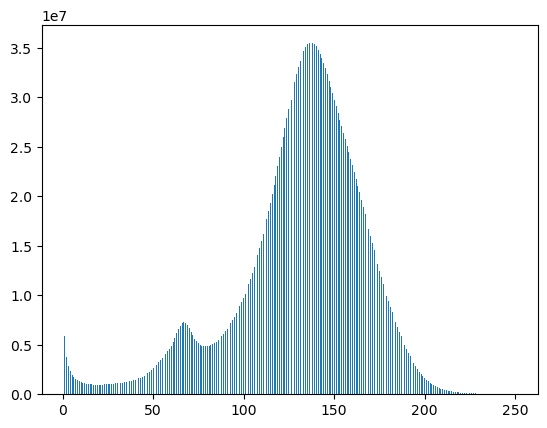

In [11]:
plt.hist(em[em > 0], bins=500)

In [12]:
v.add_labels(em < 80, name="80")

<Labels layer '80' at 0x7f10940a7c70>

In [13]:
v.add_labels(em < 50, name="50")

<Labels layer '50' at 0x7f10940a7f10>

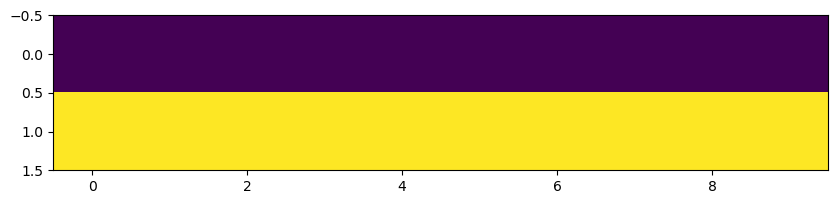

In [45]:
plt.figure(figsize=(10, 10))
plt.imshow(em_segm[566:568, 500:510, 400] == -1,)